# **Анализ рынка автомобилей в Республике Казахстан**

### **ЧАСТЬ 1 ПРЕДОБРАБОТКА ДАННЫХ**

**Импорт библиотек и чтение файла**

In [123]:
!pip install dateparser # для преобразования названия месяца в числовое значение

In [124]:
# импорт библиотек

import dateparser

import datetime

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import seaborn as sns

pd.set_option('display.max_columns', None)

pd.set_option('display.float_format', '{:.0f}'.format) # Установка формата отображения чисел

plt.rcParams['figure.figsize'] = (12, 8)

In [125]:
# чтение файла
url='https://drive.google.com/file/d/1pwmjRrLzsVRFRbFKyjQmKgIdNHNTCz44/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, decimal =',', sep=';')

**1.1. Изучение общуей информации о датасете:**

In [126]:
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             39966 non-null  int64  
 1   Месяц                           39966 non-null  object 
 2   Компания                        39966 non-null  object 
 3   Бренд                           39966 non-null  object 
 4   Модель                          39966 non-null  object 
 5   Модификация                     36375 non-null  object 
 6   Год выпуска                     39465 non-null  object 
 7   Страна-производитель            39966 non-null  object 
 8   Вид топлива                     36826 non-null  object 
 9   Объём двиг, л,                  35708 non-null  object 
 10  Коробка передач                 36711 non-null  object 
 11  Тип привода                     35677 non-null  object 
 12  Сегмент                         

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Сегмент,Регион,Наименование дилерского центра,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1,28115,28115,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,наличный,1,32247,32247,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1,32000,32000,г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт


Описание данных:

- Год – год продажи (2019)

- Месяц – месяц продажи (январь - сентябрь)

- Компания – название автоцентра

- Бренд – название продаваемой марки автомобиля

- Модель – название модели автомобиля

- Модификация – модификация модели автомобиля (удаляем)

- Год выпуска – год производства автомобиля

- Страна-производитель – страна, где произведен автомобиль

- Вид топлива – бензин, дизель, электричество, гибрид

- Объём двиг л – объем двигателя автомобиля в литрах

- Коробка передач – тип коробки переключения передач (оставляем два варианта: автоматическая, механическая, то есть все что не механика ставим автомат, на DSG, S-Tronic и прочее делить не надо, равно как и количество передач)

- Тип привода – в итоге оставляем RWD – задний привод, FWD – передний привод, 4WD – полный привод, 2WD – все остальное (подключаемый полный привод и где нет четкого указания передний или задний это привод)

- Сегмент – сегмент, к которому относится авто (удаляем)

- Регион – регион продажи

- Наименование дилерского центра – совпадает с компанией – можно удалить

- Тип клиента – юридическое или физическое лицо (в рамках анализа не критично – можно удалить)

- Форма расчета – наличный и безналичный расчет (много пропусков – можно удалять)

- Количество – количество автомобилей в заказе

- Цена USD – цена автомобиля

- Продажа USD – цена заказа (цена авто умноженная на количество и за вычетом скидок если есть)

- Область – область продажи

- Сегментация 2013 – сегмент автомобиля актуальный

- Класс 2013 – класс автомобиля актуальный

- Сегментация Eng – английская сегментация (удаляем)

- Локализация производства – удаляем (совпадает со страной производителем)

**1.2 Обработка пропусков и дубликатов**

Посмотрим количество пропусков и явных дубликатов:

In [127]:
print('Всего явных дубликатов:', df.duplicated().sum())
print('Процент явных дубликатов: {:.1%}'.format(df.duplicated().sum()/df.shape[0]))

# создаём дф с общим столбцом из категорий

pd.DataFrame(
    {'Всего пропусков': df.isna().sum(),
    '% пропусков': df.isna().mean()*100}
).style.background_gradient('Blues')

Всего явных дубликатов: 18698
Процент явных дубликатов: 46.8%


,Всего пропусков,% пропусков
Год,0,0.000000
Месяц,0,0.000000
Компания,0,0.000000
Бренд,0,0.000000
Модель,0,0.000000
Модификация,3591,8.985137
Год выпуска,501,1.253566
Страна-производитель,0,0.000000
Вид топлива,3140,7.856678
"Объём двиг, л,",4258,10.654056


Явных дубликатов почти половина датасета. Т.к. мы не располагаем уточняющими сведениями (такими как дата и время продажи или vin номер автомобиля), то будем считать все продажи уникальными - в один месяц один салон мог совершить несколько однотипных сделок.

Больше всего пропусков в столбце `Форма расчета` - 65%, `Тип клиента` - 18% и `Сегмент` - 17%. Эти столбцы нас не интересуют, как и столбец `Модификация` - 9% пропусков.  
В столбцах `Вид топлива`, `Объём двиг, л,`, `Коробка передач`	и `Тип привода` от 8% до 11% пропусков. Если получится, эти пропуски попробуем заполнить значениями, если нет - оставим как есть.

**1.3 Работа с типами данных**

Заменим значения в столбце `Месяц` на числовые:

In [128]:
# проходимся по каждому месяцу, меняем его русское название на номер месяца

month_list = df['Месяц'].unique().tolist()
for month in month_list:
  parsed_date = dateparser.parse(month, languages=['ru'])
  if parsed_date:
    month_number = parsed_date.month
    df.loc[df['Месяц'] == month, 'Месяц'] = month_number

df.head()

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Сегмент,Регион,Наименование дилерского центра,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,5,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1,28115,28115,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,8,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,наличный,1,32247,32247,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,4,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1,32000,32000,г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,7,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,7,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт


Cоздадим из столбцов `Год` и `Месяц` единый столбец `date` - дата продажи (число месяца ставим последний день - 30 или 31)

In [129]:
def gener_date(row):
    year = row['Год']
    month = row['Месяц']
    if month == 2:
        return datetime.date(year, month, 28)
    if month in [4, 6, 9]:
        return datetime.date(year, month, 30)
    return datetime.date(year, month, 31)

In [130]:
df['date'] = df.apply(gener_date, axis=1)

df.head()

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Сегмент,Регион,Наименование дилерского центра,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства,date
0,2019,5,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1,28115,28115,г.Алматы,Легковые автомобили,C класс,C,Импорт,2019-05-31
1,2019,8,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,наличный,1,32247,32247,г.Алматы,Легковые автомобили,C класс,C,Импорт,2019-08-31
2,2019,4,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1,32000,32000,г.Алматы,Легковые автомобили,D класс,D,Импорт,2019-04-30
3,2019,7,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт,2019-07-31
4,2019,7,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт,2019-07-31


**1.4 Переименование и удаление лишних столбцов**

Переименуем столбцы:

In [131]:
new_column_names = {'Компания': 'company',
                    'Бренд': 'brand',
                    'Модель': 'model',
                    'Год выпуска': 'year',
                    'Страна-производитель': 'country',
                    'Вид топлива': 'fuel',
                    'Объём двиг, л,': 'engine',
                    'Коробка передач': 'transmission',
                    'Тип привода': 'drive_unit',
                    'Регион': 'region',
                    'Количество': 'amount',
                    'Цена, USD': 'price',
                    'Продажа, USD': 'revenue',
                    'Сегментация 2013': 'segment',
                    'Класс 2013': 'car_class'}

df = df.rename(columns=new_column_names)

df.head()

,Год,Месяц,company,brand,model,Модификация,year,country,fuel,engine,transmission,drive_unit,Сегмент,region,Наименование дилерского центра,Тип клиента,Форма расчета,amount,price,revenue,Область,segment,car_class,Сегментация Eng,Локализация производства,date
0,2019,5,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1,28115,28115,г.Алматы,Легковые автомобили,C класс,C,Импорт,2019-05-31
1,2019,8,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,наличный,1,32247,32247,г.Алматы,Легковые автомобили,C класс,C,Импорт,2019-08-31
2,2019,4,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1,32000,32000,г.Алматы,Легковые автомобили,D класс,D,Импорт,2019-04-30
3,2019,7,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт,2019-07-31
4,2019,7,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1,31929,31929,г.Алматы,Легковые автомобили,D класс,D,Импорт,2019-07-31


Удаляем столбцы:
- Год
- Месяц
- Модификация
- Сегмент (используем вместо него Сегмент 2013)
- Наименование дилерского центра (совпадает с Компанией)
- Тип клиента (заказчикам не важен этот пункт)
- Форма расчета (много пропусков)
- Область (частично повторяет Регион)
- Класс Eng (используем вместо него Класс 2013)
- Локализация производства

In [132]:
cols = [0, 1, 5, 12, 14, 15, 16, -6, -3, -2]

df.drop(df.columns[cols], axis=1 , inplace=True)

df.head()

,company,brand,model,year,country,fuel,engine,transmission,drive_unit,region,amount,price,revenue,segment,car_class,date
0,Mercur Auto,Audi,A3,2018,Германия,Бензин,"1,4",S-tronic,передний,Алматы,1,28115,28115,Легковые автомобили,C класс,2019-05-31
1,Mercur Auto,Audi,A3,2018,Германия,Бензин,"1,4",S-tronic,передний,Алматы,1,32247,32247,Легковые автомобили,C класс,2019-08-31
2,Mercur Auto,Audi,A4,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Алматы,1,32000,32000,Легковые автомобили,D класс,2019-04-30
3,Mercur Auto,Audi,A4,2018,Германия,Бензин,"1,4",S-tronic,передний,Алматы,1,31929,31929,Легковые автомобили,D класс,2019-07-31
4,Mercur Auto,Audi,A4,2018,Германия,Бензин,"1,4",S-tronic,передний,Алматы,1,31929,31929,Легковые автомобили,D класс,2019-07-31


#### Замена пропущенных значений на `NaN`

In [133]:
df = df.replace(['0', '#Н/Д'], np.nan)

**1.5 Очистка данных от некорректных значений**

#### Удаляем неявные дубликаты в столбце название компании (названия на английском и русском)

In [134]:
df.company.unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Caspian Motors',
       'Каспиан Моторс', 'СемАЗ', 'Astana Motors', 'Astana Motors ',
       'Hyundai Com Trans Kazakhstan ', 'Nissan Manufacturing RUS',
       'СВС-ТРАНС', 'Allur Auto', 'Almaty Motors Premium', 'TERRA MOTORS',
       'ТК КАМАЗ', 'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'MAN Truck & Bus Kazakhstan', 'Автомир ГК', 'Autokapital',
       'Автокапитал', 'ММС Рус', 'MMC RUS', 'Mercur Autos',
       'УзАвто-Казахстан', 'Равон Моторс Казахстан',
       'Ravon Motors Kazakstan', 'Renault Россия', 'Scania Central Asia',
       'Subaru Kazakhstan', 'Volkswagen Group Rus', 'Автодом Motors KST',
       'Автомир-Центр', 'ТОО "Eurasia Motor Zhaik"',
       'Scandinavian Motors', 'Хино Моторс Казахстан', 'Hino Motors '],
      dtype=object)

Объединим компании:
- `Caspian Motors` и `Каспиан Моторс`
- `Astana Motors` и `Astana Motors `
- `Autokapital` и `Автокапитал`
- `ММС Рус` и `MMC RUS`
- `Равон Моторс Казахстан` и `Ravon Motors Kazakstan`
- `Хино Моторс Казахстан` и `Hino Motors `

`Mercur Auto` и `Mercur Autos` объединять не будем - это разные организации.

In [135]:
dic = {'Каспиан Моторс': 'Caspian Motors',
       'Astana Motors ': 'Astana Motors',
       'Автокапитал': 'Autokapital',
       'MMC RUS': 'ММС Рус',
       'Равон Моторс Казахстан': 'Ravon Motors Kazakstan',
       'Хино Моторс Казахстан':'Hino Motors',
       'Hino Motors ': 'Hino Motors'}

df['company'] = df['company'].replace(dic)

df.company.unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Caspian Motors',
       'СемАЗ', 'Astana Motors', 'Hyundai Com Trans Kazakhstan ',
       'Nissan Manufacturing RUS', 'СВС-ТРАНС', 'Allur Auto',
       'Almaty Motors Premium', 'TERRA MOTORS', 'ТК КАМАЗ',
       'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'MAN Truck & Bus Kazakhstan', 'Автомир ГК', 'Autokapital',
       'ММС Рус', 'Mercur Autos', 'УзАвто-Казахстан',
       'Ravon Motors Kazakstan', 'Renault Россия', 'Scania Central Asia',
       'Subaru Kazakhstan', 'Volkswagen Group Rus', 'Автодом Motors KST',
       'Автомир-Центр', 'ТОО "Eurasia Motor Zhaik"',
       'Scandinavian Motors', 'Hino Motors'], dtype=object)

#### Кодируем страны в столбце страна производства в alpha3 (RUS, KAZ, USA и т.д.)

In [136]:
df.country.unique()

array(['Германия', 'США', 'Австрия', 'Республика Казахстан',
       'Российская Федерация', 'Корея', 'Япония', 'Таиланд', 'Китай',
       'UK', 'Узбекистан', 'Венгрия', 'Турция', 'Испания', 'Нидерланды',
       'Польша', 'Швеция', 'Белоруссия', 'Бельгия'], dtype=object)

In [137]:
dic = {'Германия': 'DEU',
       'США': 'USA',
       'Австрия': 'AUT',
       'Республика Казахстан': 'KAZ',
       'Российская Федерация': 'RUS',
       'Корея':'KOR',
       'Япония': 'JPN',
       'Таиланд': 'THA',
       'Китай': 'CHN',
       'UK': 'GBR',
       'Узбекистан': 'UZB',
       'Венгрия': 'HUN',
       'Турция':'TUR',
       'Испания': 'ESP',
       'Нидерланды': 'NLD',
       'Польша': 'POL',
       'Швеция': 'SWE',
       'Белоруссия': 'BLR',
       'Бельгия': 'BEL'}

df['country'] = df['country'].replace(dic)
df.country.unique()

array(['DEU', 'USA', 'AUT', 'KAZ', 'RUS', 'KOR', 'JPN', 'THA', 'CHN',
       'GBR', 'UZB', 'HUN', 'TUR', 'ESP', 'NLD', 'POL', 'SWE', 'BLR',
       'BEL'], dtype=object)

#### Кодируем тип топлива

In [138]:
df.fuel.unique()

array(['Бензин', 'Дизель', nan, 'дизель ', 'бензин ', 'гибрид', '2',
       '1,6', 'Электро', 'Электричество'], dtype=object)

В столбце `fuel` обнаружены аномальные значения. Значения 2 и 1,6 похожи на объем двигателя. Посмотрим эти строки:

In [139]:
df.query('fuel in ["2","1,6"]')

df.head()

,company,brand,model,year,country,fuel,engine,transmission,drive_unit,region,amount,price,revenue,segment,car_class,date
0,Mercur Auto,Audi,A3,2018,DEU,Бензин,"1,4",S-tronic,передний,Алматы,1,28115,28115,Легковые автомобили,C класс,2019-05-31
1,Mercur Auto,Audi,A3,2018,DEU,Бензин,"1,4",S-tronic,передний,Алматы,1,32247,32247,Легковые автомобили,C класс,2019-08-31
2,Mercur Auto,Audi,A4,2018,DEU,Бензин,"1,4",S-Tronic,FWD,Алматы,1,32000,32000,Легковые автомобили,D класс,2019-04-30
3,Mercur Auto,Audi,A4,2018,DEU,Бензин,"1,4",S-tronic,передний,Алматы,1,31929,31929,Легковые автомобили,D класс,2019-07-31
4,Mercur Auto,Audi,A4,2018,DEU,Бензин,"1,4",S-tronic,передний,Алматы,1,31929,31929,Легковые автомобили,D класс,2019-07-31


Так и есть - столбцы `engine`, `transmission` и `drive_unit` съехали влево.

Столбец `transmission` заполним значениями `engine`, столбец `engine` - значениями из столбца `fuel`. В столбце `fuel` заменим значения на `NaN`.


In [173]:
df.loc[(df['fuel']== "2") | (df['fuel']== "1,6"), 'transmission'] = df['engine']

df.loc[(df['fuel']== "2") | (df['fuel']== "1,6"), 'engine'] = df['fuel']

In [141]:
df['fuel'].replace(["2", "1,6"], np.nan, inplace=True)

df.fuel.unique()

array(['Бензин', 'Дизель', nan, 'дизель ', 'бензин ', 'гибрид', 'Электро',
       'Электричество'], dtype=object)

Для кодировки типа топлива будем использовать следующие значения:
- Бензин: B
- Дизель: D
- Электричество: E
- Гибрид: H

In [142]:
# создание словаря кодировки

dic = {'Бензин': 'B',
       'бензин ': 'B',
       'Дизель': 'D',
       'дизель ': 'D',
       'гибрид': 'H',
       'Электро':'E',
       'Электричество': 'E'}

# замена значений в столбце fuel на закодированные значения

df['fuel'] = df['fuel'].replace(dic)

df.fuel.unique()

array(['B', 'D', nan, 'H', 'E'], dtype=object)

#### Удаляем неявные дубликаты в столбце тип привода

In [143]:
df.drive_unit.unique()

array(['передний', 'FWD', 'quattro', 'Задний', 'Полный', 'AWD',
       'Передний', '4WD', '4х2.2', nan, 'RWD', '2 WD', '2WD', '4 WD',
       '4X4', '4х4', '4x4', '4x2', '4х2', '4X2', 'Астана',
       'Передний (FF)', 'FF', 'полный', '4Motion'], dtype=object)

Оставляем:
- `FWD` – передний привод
- `4WD` – полный привод
- `RWD` – задний привод
- `2WD` – все остальное, где привод неявно указан

In [144]:
def replace_value(value):
  if value in ['4WD', 'quattro', 'Полный', 'полный', 'AWD', '4 WD', '4Motion', '4X4', '4х4', '4x4']:
    return '4WD'
  if value in ['передний', 'FWD', 'Передний', 'Передний (FF)', 'FF']:
    return 'FWD'
  if value in ['Задний', 'RWD']:
    return 'RWD'
  if value in ['4х2.2', '2 WD', '2WD', '4X2', '4x2', '4х2']:
    return '2WD'
  else:
    return value

In [145]:
df['drive_unit'] = df['drive_unit'].apply(replace_value)

df.drive_unit.unique()

array(['FWD', '4WD', 'RWD', '2WD', nan, 'Астана'], dtype=object)

Посмотрим строки с аномальным значением `Астана`:

In [146]:
df.query('drive_unit == "Астана"')

,company,brand,model,year,country,fuel,engine,transmission,drive_unit,region,amount,price,revenue,segment,car_class,date
15771,ТК КАМАЗ,KAMAZ,65116,2019,KAZ,D,NaN,MT,Астана,Нур-Султан,1,55656,55656,Коммерческие автомобили,Крупнотоннажные грузовики,2019-05-31
39549,ТК КАМАЗ,KAMAZ,45141,2019,KAZ,D,NaN,MT,Астана,Нур-Султан,1,53964,53964,Коммерческие автомобили,Крупнотоннажные грузовики,2019-05-31


Заменим `Астана` в столбце `drive_unit` на `NaN`:

In [147]:
df['drive_unit'] = df['drive_unit'].replace('Астана', np.nan)

df.drive_unit.unique()

array(['FWD', '4WD', 'RWD', '2WD', nan], dtype=object)

#### Удаляем неявные дубликаты в столбце тип трансмиссии

In [148]:
df.transmission.unique()

array(['S-tronic', 'S-Tronic', 'Tiptronic', 'АКПП', 'АКП', 'Steptronic',
       'AT', '6 АТ', '5 МТ', '6АТ', 'MT', '8AT', '5МТ', 'Powershift S6',
       '6AT', nan, 'Мех.', '6 AT', '6 MT', '6MT', '5 AT', '5AT', 'МКПП',
       '7 DCT', '7DCT', '8 AT', 'МТ', 'CVT', 'DCT', '4 АТ', '6 МТ', '6МТ',
       '4АТ', '4AT', '8АТ', '8 АТ', '5MT', 'AMT', 'CVT (вариатор)',
       'CVT (вариATор)', 'CVT(вAриATор)', '7G-TRONIC', '9G-TRONIC',
       '12AT', '12АТ', '5АТ', '7АТ', '7AT', '6M/T', 'PDK', '8-ступ АКПП',
       '8', '8АКПП', '8 АКПП Tiptronic S', '7 АКПП (PDK)', '7 АКПП PDK',
       '8 АКПП (PDK)', 'АТ', 'АT', 'МT', '7 DSG', '7DSG', '6 DSG', '6DSG',
       'DSG', '6A', '6А', '5M', 'A/T', 'M/T', 'МКП', '5М', 'М/T',
       ' 7 АКП', '7АКП', 'А/T', '8A', 'TDI', '9AT', 'РЕДУКТОР'],
      dtype=object)

Обнаружены аномальные значения:
- `TDI` - относится к типу двигателя, а не к типу трансмиссии. `TDI` означает "турбодизельный впрыск" (Turbocharged Direct Injection) и является типом дизельного двигателя с турбонаддувом и прямым впрыском топлива.
- `РЕДУКТОР` - относится к типу передачи, который используется в внедорожных и грузовых автомобилях для обеспечения повышенного крутящего момента на колесах. Редуктор может быть как механическим, так и автоматическим, в зависимости от конкретной модели и дизайна автомобиля.

In [149]:
df.query('transmission in ["TDI", "РЕДУКТОР"]')

,company,brand,model,year,country,fuel,engine,transmission,drive_unit,region,amount,price,revenue,segment,car_class,date
39077,Allur Auto,Jac,T6,2019,KAZ,D,2,TDI,4WD,Атырау,1,21791,21791,Внедорожники,Компактные SUV,2019-04-30
39078,Allur Auto,Jac,T6,2019,KAZ,D,2,TDI,4WD,Алматы,1,23686,23686,Внедорожники,Компактные SUV,2019-04-30
39079,Allur Auto,Jac,T6,2019,KAZ,D,2,TDI,4WD,Алматы,1,23686,23686,Внедорожники,Компактные SUV,2019-04-30
39080,Allur Auto,Jac,T6,2019,KAZ,D,2,TDI,4WD,Алматы,1,23686,23686,Внедорожники,Компактные SUV,2019-04-30
39081,Allur Auto,Jac,T6,2019,KAZ,D,2,TDI,4WD,Алматы,1,23686,23686,Внедорожники,Компактные SUV,2019-04-30
39082,Allur Auto,Jac,T6,2019,KAZ,D,2,TDI,4WD,Алматы,1,23686,23686,Внедорожники,Компактные SUV,2019-04-30
39083,Allur Auto,Jac,T6,2019,KAZ,D,2,TDI,4WD,Алматы,1,23686,23686,Внедорожники,Компактные SUV,2019-04-30
39084,Allur Auto,Jac,T6,2019,KAZ,D,2,TDI,4WD,Алматы,1,23686,23686,Внедорожники,Компактные SUV,2019-04-30
39085,Allur Auto,Jac,T6,2019,KAZ,D,2,TDI,4WD,Алматы,1,23686,23686,Внедорожники,Компактные SUV,2019-04-30
39086,Allur Auto,Jac,T6,2019,KAZ,D,2,TDI,4WD,Алматы,1,23686,23686,Внедорожники,Компактные SUV,2019-04-30


Автомобиль JAC T6 2019 года с двухлитровым дизельным двигателем TDI обычно оснащается 6-ступенчатой автоматической коробкой передач.

У электромобиля Jaguar I-Pace 2019 года с мощностью 400 лошадиных сил нет традиционной механической или автоматической коробки передач. Вместо этого, Jaguar I-Pace оснащен электрической системой привода, которая не требует использования традиционной коробки передач. Вместо этого, энергия от электромоторов передается на колеса через электронно управляемую систему привода с переменным передаточным числом (Inverter-Driven Single-Speed Transmission), которая позволяет обеспечить оптимальное ускорение и эффективность электромобиля.

Создадим новый столбец `category_transmission` и разделим автомобили по типу трансмиссии на две категории - механика и автомат:

In [175]:
condition = df['transmission'].str.contains('а|a|tronic|cvt|dsg|pdk|dct|powershift|8|tdi|редуктор', case=False, na=False)

df['category_transmission'] = np.where(condition, 'АКПП', np.where(df['transmission'].notnull(), 'МКПП', np.nan))

print("Механическая коробка передач: \n", df.query('category_transmission == "МКПП"').transmission.unique())

print("\n Автоматическая коробка передач: \n", df.query('category_transmission == "АКПП"').transmission.unique())

Механическая коробка передач: 
 ['5 МТ' 'MT' '5МТ' 'Мех.' '6 MT' '6MT' 'МКПП' 'МТ' '6 МТ' '6МТ' '5MT'
 '6M/T' 'МT' '5M' 'M/T' 'МКП' '5М' 'М/T']

 Автоматическая коробка передач: 
 ['S-tronic' 'S-Tronic' 'Tiptronic' 'АКПП' 'АКП' 'Steptronic' 'AT' '6 АТ'
 '6АТ' '8AT' 'Powershift S6' '6AT' '6 AT' '5 AT' '5AT' '7 DCT' '7DCT'
 '8 AT' 'CVT' 'DCT' '4 АТ' '4АТ' '4AT' '8АТ' '8 АТ' 'AMT' 'CVT (вариатор)'
 'CVT (вариATор)' 'CVT(вAриATор)' '7G-TRONIC' '9G-TRONIC' '12AT' '12АТ'
 '5АТ' '7АТ' '7AT' 'PDK' '8-ступ АКПП' '8' '8АКПП' '8 АКПП Tiptronic S'
 '7 АКПП (PDK)' '7 АКПП PDK' '8 АКПП (PDK)' 'АТ' 'АT' '7 DSG' '7DSG'
 '6 DSG' '6DSG' 'DSG' '6A' '6А' 'A/T' ' 7 АКП' '7АКП' 'А/T' '8A' 'TDI'
 '9AT' 'РЕДУКТОР']


#### Чистим столбец объем двигателя

In [151]:
df.engine.unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '1,4 Turbo', '2,5', '1,6', nan, '2,8', '4,3', '4,3,',
       '1,6 MPI', '2,0 MPI', '2,4 GDI', '2,4 MPI', '2,5 CRDI VGT',
       '2,5 CRDI WGT', '3,9', '7,5', '12,3', '1,6 T-GDI', '2,0 CRDI',
       '2.0', '3,5', '5,6', '5,2', '3,0 L', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7 ', '3.5', '2.7', '4.6', '4,6', '5.7',
       '1,8', '10,5', '4', '5,5', '12', '12,8', '11', '2,2', '1,2',
       '1,485', '13', '1,33', '4.0', '2.4G', '2,4G', '2.8', '2,693',
       '2,0', '3,8', '3.8', '1,2T', '3,6', '7,6', '4,9', '2.0h', '2,9',
       '400 Л.С.', '4,98 L,', '4,98', '88 KWH', '8,4 L,', '6,7L', '6,5'],
      dtype=obje

Наведём порядок в столбце `engine`, для этого:
- заменим запятую на точку;
- уберем буквенные символы;
- разберёмся с аномальные значения - больше 10.

Что означают буквенные символы:
- `L` - литры
- `T` и `Turbo` - с турбонаддувом (Turbocharged)
- `GDI` - с прямым впрыском топлива (Gasoline Direct Injection)
- `MPI` - с многоточечным впрыском топлива (Multi-Point Injection)
- `CRDI VGT` - работает на Common Rail Direct Injection (CRDI) системе с изменяемой геометрией турбины (VGT - Variable Geometry Turbocharger)
- `CRDI WGT` - работает на системе впрыска топлива Common Rail Direct Injection (CRDI) с воздушным охлаждением (WGT - Water-Gate Turbocharger).


Посмотрим электромобили:

In [152]:
df.query('fuel == "E"')

,company,brand,model,year,country,fuel,engine,transmission,drive_unit,region,amount,price,revenue,segment,car_class,date,category_transmission
39544,Almaty Motors Premium,Jaguar,I-Pace,2019,GBR,E,400 Л.С.,РЕДУКТОР,4WD,Алматы,1,117237,117237,Внедорожники,Компактные SUV,2019-02-28,АКПП
39545,Almaty Motors Premium,Jaguar,I-Pace,2019,GBR,E,400 Л.С.,РЕДУКТОР,4WD,Алматы,1,105389,105389,Внедорожники,Компактные SUV,2019-04-30,АКПП
39546,Almaty Motors Premium,Jaguar,I-Pace,2019,GBR,E,400 Л.С.,РЕДУКТОР,4WD,Алматы,1,120413,120413,Внедорожники,Компактные SUV,2019-06-30,АКПП
39818,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,E,88 KWH,NaN,2WD,Костанай,1,307986,307986,Коммерческие автомобили,Большие автобусы,2019-07-31,nan
39819,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,E,88 KWH,NaN,2WD,Костанай,1,307986,307986,Коммерческие автомобили,Большие автобусы,2019-07-31,nan
39820,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,E,88 KWH,NaN,2WD,Костанай,1,307986,307986,Коммерческие автомобили,Большие автобусы,2019-07-31,nan
39821,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,E,88 KWH,NaN,2WD,Костанай,1,307986,307986,Коммерческие автомобили,Большие автобусы,2019-07-31,nan
39822,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,E,88 KWH,NaN,2WD,Костанай,1,307986,307986,Коммерческие автомобили,Большие автобусы,2019-07-31,nan
39823,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,E,88 KWH,NaN,2WD,Костанай,1,307986,307986,Коммерческие автомобили,Большие автобусы,2019-07-31,nan
39824,Allur Auto,ANKAI,HFF6124G03EV3,2019,KAZ,E,88 KWH,NaN,2WD,Костанай,1,307986,307986,Коммерческие автомобили,Большие автобусы,2019-07-31,nan


У Jaguar I-Pace нет двигателя в привычном понимании для автомобилей с нутренним сгоранием. Jaguar I-Pace является электромобилем и использует электрическую систему привода, которая включает два электромотора. Поэтому нет конкретного литража двигателя у Jaguar I-Pace, так как он не имеет традиционного двигателя внутреннего сгорания. Вместо этого, Jaguar I-Pace характеризуется мощностью двигателей (400 лошадиных сил) и батареей с емкостью 90 киловатт-часов для питания электромоторов.

HFF6124G03EV3 - это модель электрического автобуса, выпускаемого компанией Anhui Ankai Automobile Co., Ltd. в Китае. Так как это электромобиль, он использует электрическую систему привода вместо традиционного двигателя внутреннего сгорания. Электрические автобусы обычно характеризуются мощностью и емкостью батареи, а не объемом двигателя.

Отредактируем значения в столбце `engine`:
- заменим `400 Л.С.` и `88 KWH` на `NaN`;
- заменим запятую на точку;
- оставим только числа и максимум одну точку:

In [153]:
df['engine'] = df['engine'].replace(['400 Л.С.', '88 KWH'], np.nan)

df['engine'] = df['engine'].str.replace(',', '.')

df['engine'] = df['engine'].str.extract(r'(\d+\.?\d*)')

df.engine.unique()

array(['1.4', '2', '3', '4.4', '6.6', '1.5', '1.596', '2.4', '1.7',
       '26.7', '25.7', '24.7', '23.7', '22.7', '21.7', '20.7', '19.7',
       '18.7', '17.7', '16.7', '15.7', '14.7', '13.7', '12.7', '11.7',
       '10.7', '9.7', '8.7', '7.7', '6.7', '5.7', '4.7', '3.7', '2.7',
       '6.2', '2.5', '1.6', nan, '2.8', '4.3', '2.0', '3.9', '7.5',
       '12.3', '3.5', '5.6', '5.2', '3.0', '5', '1.598', '1.248', '1.998',
       '2.359', '1.999', '3.342', '1.591', '3.47', '1.69', '1.774', '4.6',
       '1.8', '10.5', '4', '5.5', '12', '12.8', '11', '2.2', '1.2',
       '1.485', '13', '1.33', '4.0', '2.693', '3.8', '3.6', '7.6', '4.9',
       '2.9', '4.98', '8.4', '6.5'], dtype=object)

Меняет тип данных столбца `engine` на `float` и поcмотрим аномально большие значения:

In [176]:
df['engine'] = df['engine'].astype('float')

df.query('engine > 10').head()

,company,brand,model,year,country,fuel,engine,transmission,drive_unit,region,amount,price,revenue,segment,car_class,date,category_transmission
9699,Hyundai Com Trans Kazakhstan,Hyundai Truck & Bus,Universe,2017,KOR,D,12,МКПП,2WD,Алматы,2,207148,414297,Коммерческие автомобили,Большие автобусы,2019-01-31,МКПП
9700,Hyundai Com Trans Kazakhstan,Hyundai Truck & Bus,Universe,2017,KAZ,D,12,МКПП,2WD,Алматы,2,243388,486777,Коммерческие автомобили,Большие автобусы,2019-03-31,МКПП
20212,MAN Truck & Bus Kazakhstan,MAN,TG,2018,DEU,D,10,NaN,NaN,Алматы,2,147501,295003,Коммерческие автомобили,Крупнотоннажные грузовики,2019-01-31,nan
20213,MAN Truck & Bus Kazakhstan,MAN,TG,2018,DEU,D,10,NaN,NaN,Алматы,1,147501,147501,Коммерческие автомобили,Крупнотоннажные грузовики,2019-01-31,nan
20214,MAN Truck & Bus Kazakhstan,MAN,TG,2018,DEU,D,10,NaN,NaN,Алматы,10,147701,1477016,Коммерческие автомобили,Крупнотоннажные грузовики,2019-02-28,nan


В классе автомобиля `Крупнотоннажные грузовики` и `Большие автобусы` значения объема двигателя от 10,5 до 13 л не являются аномальными.

Однако, у автомобилей `Chevrolet Niva` значения объема двигателя аномально высокие.

In [155]:
df.query('model == "Niva"').engine.value_counts()

2     542
27      1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
3       1
Name: engine, dtype: int64

Объем двигателя автомобиля Chevrolet Niva - 1,7 л. Заменим аномальные значения на `1.7`:

In [156]:
df.loc[(df['model'] == 'Niva') & (df['engine'] > 2), 'engine'] = 1.7

df.query('model == "Niva"').engine.value_counts()

2    567
Name: engine, dtype: int64

Округлим значения в столбце `engine` до 1 знака после запятой:

In [157]:
df['engine'] = df['engine'].round(1)

df.engine.unique()

array([ 1.4,  2. ,  3. ,  4.4,  6.6,  1.5,  1.6,  2.4,  1.7,  6.2,  2.5,
        nan,  2.7,  2.8,  4.3,  3.9,  7.5, 12.3,  3.5,  5.6,  8.7,  5.2,
        5. ,  1.2,  3.3,  1.8,  4.6,  5.7, 10.5,  4. ,  5.5, 12. , 12.8,
       11. ,  2.2, 13. ,  1.3,  3.8,  3.6,  7.6,  4.9,  2.9,  8.4,  6.7,
        6.5])

#### Удаляем строки с пропущенными значениями в столбце количество

In [158]:
df.amount.unique()

array([  1.,   2.,   4.,   3.,   7.,   5.,   8.,  10.,   6.,   9.,  11.,
        19.,  12.,  70.,  29.,  18.,  37.,  17.,  15.,  24.,  14.,  13.,
        25.,  63.,  23.,  30.,  21.,  60.,  nan,  22.,  16.,  35.,  28.,
        32.,  54., 115.,  46.,  33.,  47.,  20.,  66.,  27.,  50.,  36.,
        26.,  31.,  34.,  40.,  43.,  51.,  42.,  38.,  41., 100.,  -1.,
        79.,  62.])

Посмотрим строки с аномальными значениями в столбце `amount`:

In [159]:
df.query('0 > amount or amount >= 100')

,company,brand,model,year,country,fuel,engine,transmission,drive_unit,region,amount,price,revenue,segment,car_class,date,category_transmission
16885,БИПЭК АВТО,Lada,4x4,2019,KAZ,B,2,5 МТ,4WD,Тараз,115,9000,1035000,Внедорожники,Субкомпактные SUV,2019-05-31,МКПП
25555,БИПЭК АВТО,Skoda,Octavia,2019,KAZ,B,1,6MT,FWD,Тараз,100,18700,1870000,Легковые автомобили,C класс,2019-07-31,МКПП
25728,БИПЭК АВТО,Skoda,Superb,2019,KAZ,B,2,6DSG,4WD,Тараз,-1,35588,-35588,Легковые автомобили,D класс,2019-08-31,АКПП


Продажи на `100` и `115` машин редки, но возможны. Продажа `-1` машины - это возврат.

Посмотрим строки с пропусками в столбце `amount`:

In [160]:
df[(df['amount'].isnull()) | (df['revenue'] == 0)]

,company,brand,model,year,country,fuel,engine,transmission,drive_unit,region,amount,price,revenue,segment,car_class,date,category_transmission
16741,БИПЭК АВТО,Kia,Sportage,2019,KAZ,B,2,6АТ,4WD,Караганда,NaN,20700,0,Внедорожники,Компактные SUV,2019-08-31,АКПП
17368,БИПЭК АВТО,Lada,Granta,2019,KAZ,B,2,AMT,FWD,Алматы,NaN,7100,0,Легковые автомобили,B класс,2019-08-31,АКПП
18676,БИПЭК АВТО,Lada,XRAY,2018,KAZ,B,2,5МТ,FWD,Экибастуз,NaN,13800,0,Легковые автомобили,B класс,2019-08-31,МКПП
37416,БИПЭК АВТО,UAZ,3909,2018,KAZ,B,3,5МТ,4WD,Алматы,NaN,11200,0,Коммерческие автомобили,Развозные автомобили,2019-08-31,МКПП
37727,БИПЭК АВТО,UAZ,Patriot,2018,KAZ,B,3,5МТ,4WD,Семей,NaN,13800,0,Внедорожники,Среднеразмерные SUV,2019-08-31,МКПП
38775,БИПЭК АВТО,Skoda,Kodiaq,2019,KAZ,B,2,7DSG,4WD,Нур-Султан,NaN,40000,0,Внедорожники,Полноразмерные SUV,2019-08-31,АКПП


Удалим строки, в которых не указано количество проданных автомобилей:

In [161]:
df.dropna(subset=['amount'], inplace=True)
if df['amount'].isnull().any():
  print('Остались строки с пропущенными значениями в столбце Количество')
else:
  print('Строки с пропущенными значениями в столбце Количество успешно удалены')

Строки с пропущенными значениями в столбце Количество успешно удалены


#### Меняем тип данных

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39960 entries, 0 to 39965
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company                39960 non-null  object 
 1   brand                  39960 non-null  object 
 2   model                  39960 non-null  object 
 3   year                   39459 non-null  object 
 4   country                39960 non-null  object 
 5   fuel                   36780 non-null  object 
 6   engine                 35685 non-null  float64
 7   transmission           36698 non-null  object 
 8   drive_unit             35549 non-null  object 
 9   region                 39960 non-null  object 
 10  amount                 39960 non-null  float64
 11  price                  39960 non-null  float64
 12  revenue                39960 non-null  float64
 13  segment                39960 non-null  object 
 14  car_class              39960 non-null  object 
 15  da

Заменим тип данных в столбце `date` на `datetime`, в столбцах `fuel`, `drive_unit`, `segment` и `car_class` на `category`, а в столбцах `amount`, `price` и `revenue` - на `int`:

In [163]:
convert_to_int = ['amount', 'price', 'revenue']
convert_to_category = ['fuel', 'drive_unit', 'segment', 'car_class', 'category_transmission']
for column in convert_to_int:
  df[column] = df[column].astype('int')
for column in convert_to_category:
  df[column] = df[column].astype('category')
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39960 entries, 0 to 39965
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   company                39960 non-null  object        
 1   brand                  39960 non-null  object        
 2   model                  39960 non-null  object        
 3   year                   39459 non-null  object        
 4   country                39960 non-null  object        
 5   fuel                   36780 non-null  category      
 6   engine                 35685 non-null  float64       
 7   transmission           36698 non-null  object        
 8   drive_unit             35549 non-null  category      
 9   region                 39960 non-null  object        
 10  amount                 39960 non-null  int64         
 11  price                  39960 non-null  int64         
 12  revenue                39960 non-null  int64         
 13  s

# **ЧАСТЬ 2 АНАЛИЗ РЫНКА**

**2.1 Топовые марки на рынке Казахстана: в денежном и натуральном выражении**

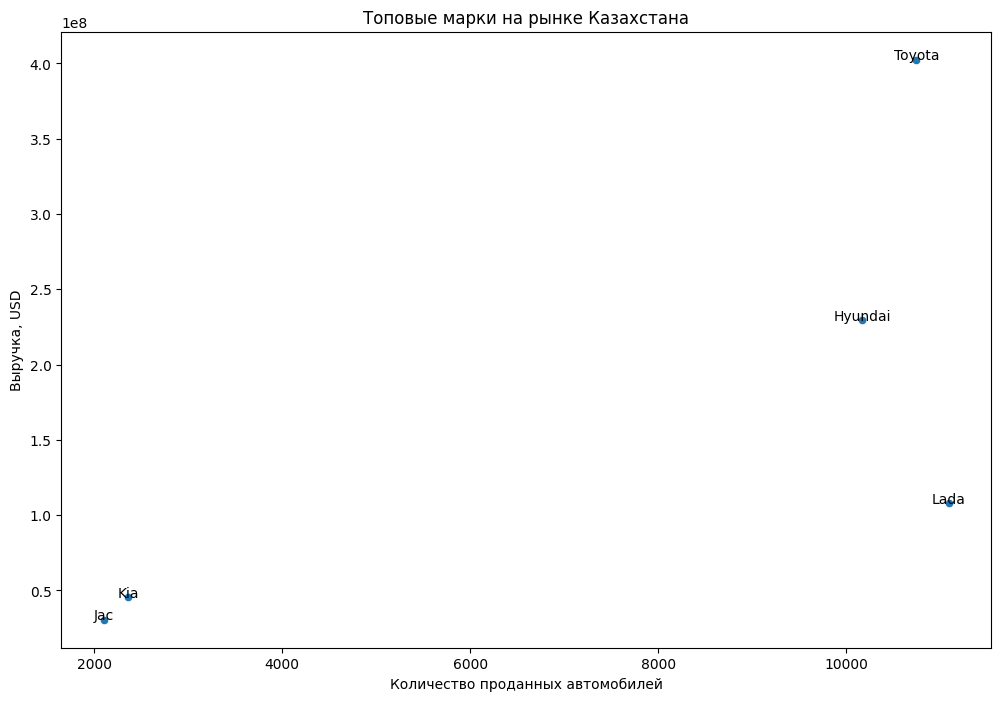

In [177]:
top_brand = df.groupby('brand', as_index=False).agg({'amount':'sum', 'revenue':'sum'}).nlargest(5, columns='amount')

sns.scatterplot(data=top_brand, x='amount', y='revenue')

for i, txt in enumerate(top_brand['brand']):
  plt.annotate(txt, (top_brand.iloc[i]['amount'], top_brand.iloc[i]['revenue']), ha='center')
plt.xlabel('Количество проданных автомобилей')
plt.ylabel('Выручка, USD')
plt.title('Топовые марки на рынке Казахстана')
plt.show()

По количеству проданных машин в Казахстане за январь-сентябрь 2019 года три явных лидера: `Lada`, `Toyota` и `Hyndai`. В денежном выражении `Toyota` на первом месте, на втором - `Hyndai` и на третьем - `Lada`.

**2.2 Продажи на рынке Казахстана всех марок в денежном и натуральном выражении**

In [165]:
print('Всего продано машин:', df.amount.sum())

print('Стоимость всех проданных машин:', df.revenue.sum())

Всего продано машин: 53874
Стоимость всех проданных машин: 1349140758


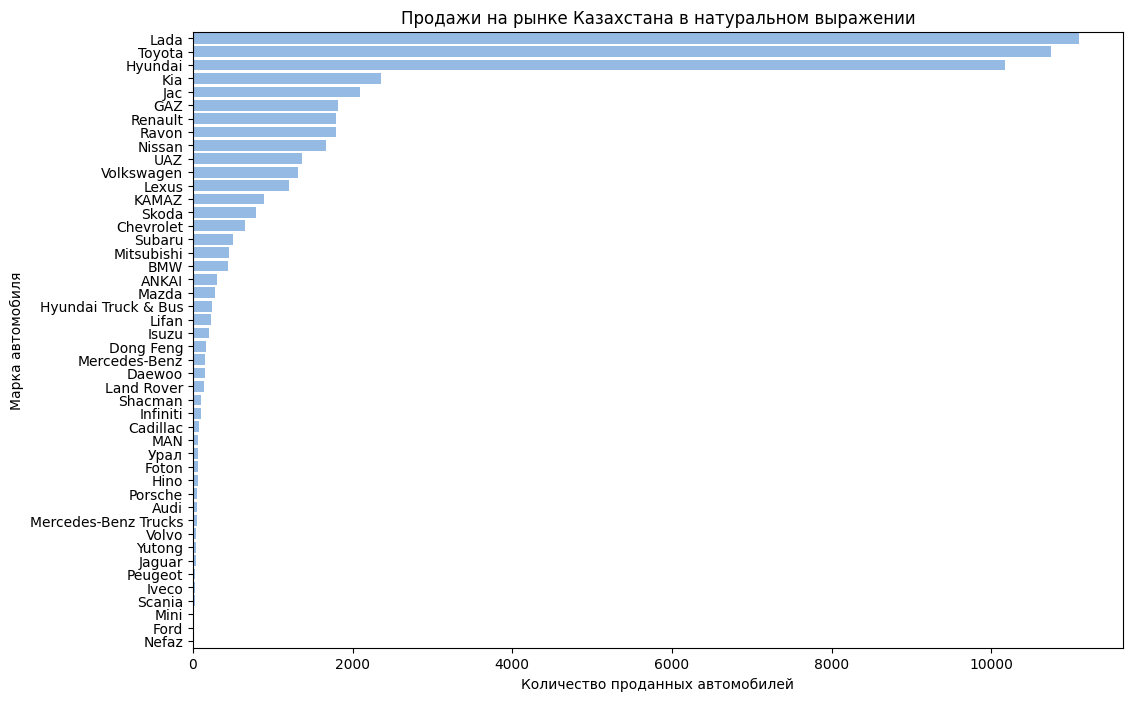

In [178]:
sales = df.groupby('brand', as_index=False).agg({'amount':'sum', 'revenue':'sum'}).sort_values(by='amount', ascending=False)

sns.barplot(data=sales, x='amount', y='brand', facecolor='#95bae4')

plt.xlabel('Количество проданных автомобилей')

plt.ylabel('Марка автомобиля')

plt.title('Продажи на рынке Казахстана в натуральном выражении')

plt.show()

На четвертом месте по количеству проданных машин, с большим отрывом от лидеров авторынка Казахстана, `Kia`, на пятом - `Jac`.

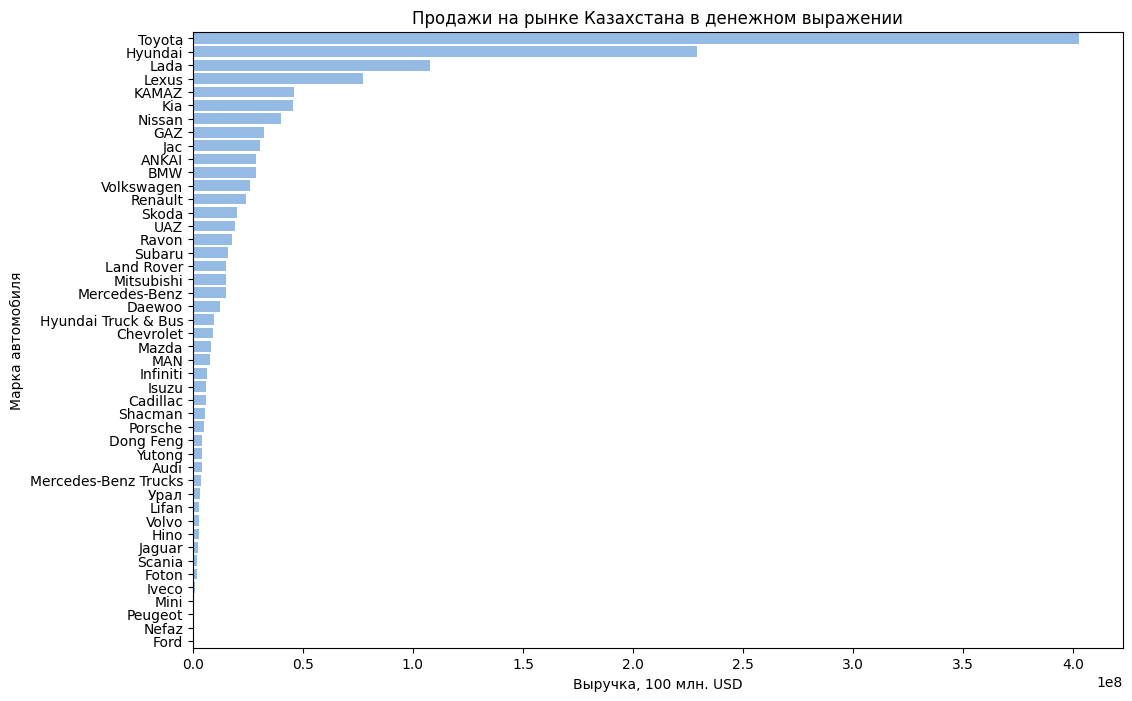

In [182]:
sales = sales.sort_values(by='revenue', ascending=False)

sns.barplot(data=sales, x='revenue', y='brand', facecolor='#95bae4')

plt.xlabel('Выручка, 100 млн. USD')

plt.ylabel('Марка автомобиля')

plt.title('Продажи на рынке Казахстана в денежном выражении')

plt.show()

По выручке `Kia` и  `Jac` обгоняют более дорогие марки машин и более крупные автомобили. `Lexus` и `KAMAZ` сдвигают вниз рейтинга `Kia`, а `Nissan` и `GAZ` - `Jac`.

**2.3 Динамика продаж в целом по рынку: в денежном и натуральном выражении**

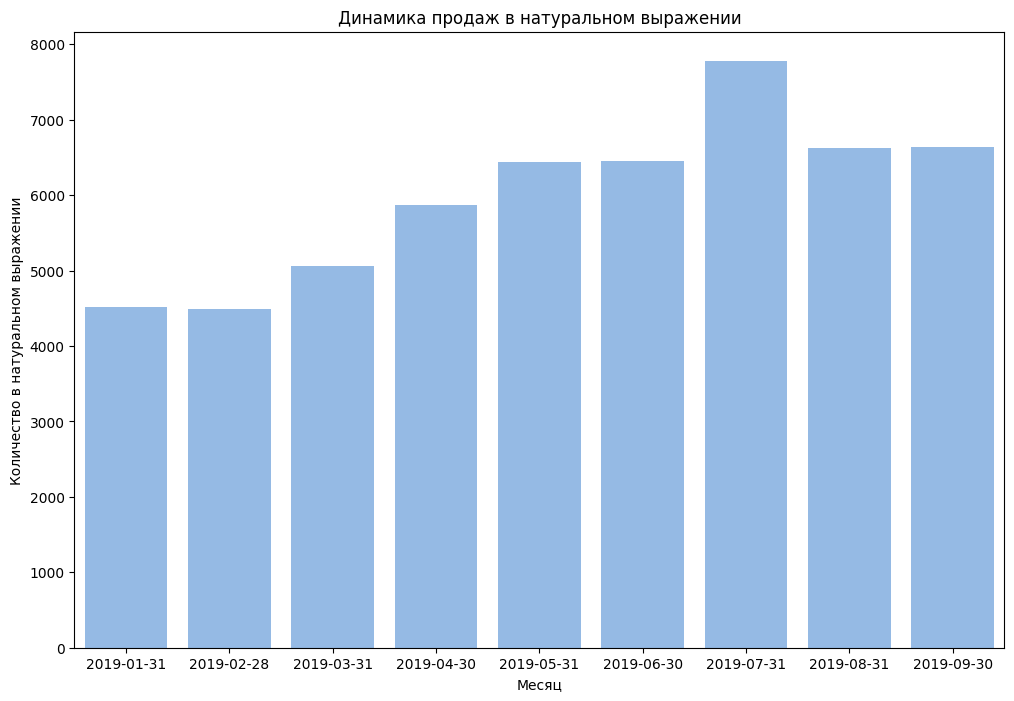

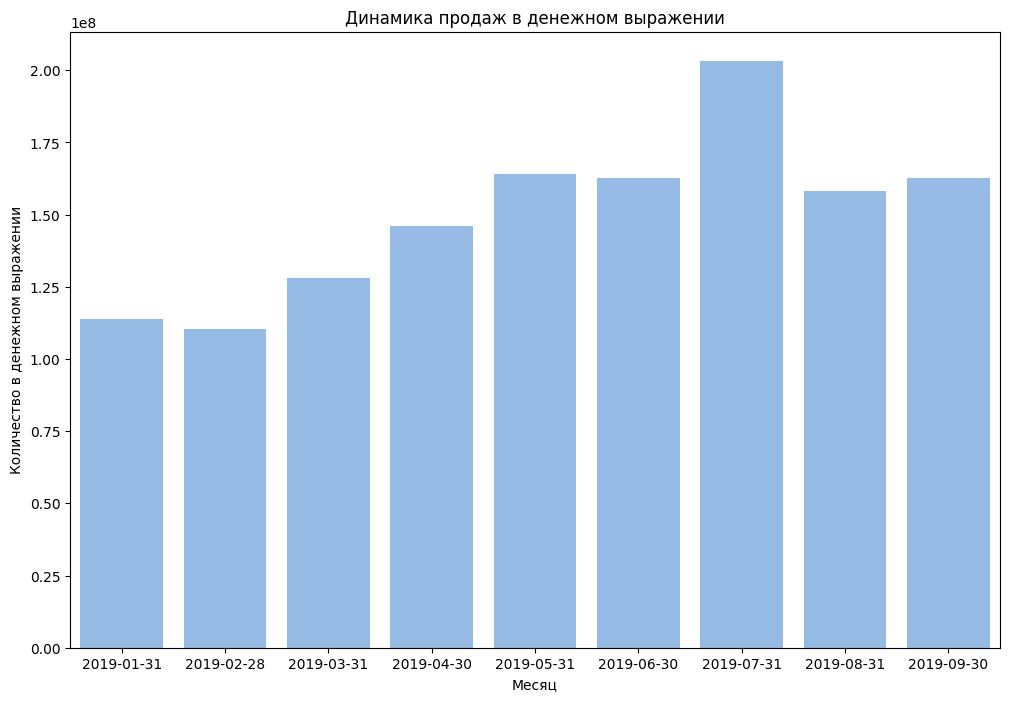

In [186]:
sales_by_months = df.groupby('date').agg({'amount':'sum', 'revenue':'sum'}).reset_index()
sales_by_months['date'] = sales_by_months['date'].dt.date
labels = ['натуральном', 'денежном']
i = 0
for column in sales_by_months.columns[1:]:
  label = labels[i]
  i = i + 1
  sns.barplot(x='date', y=column, data=sales_by_months, facecolor='#95bae4')
  plt.title(f'Динамика продаж в {label} выражении')
  plt.ylabel(f'Количество в {label} выражении')
  plt.xlabel('Месяц')
  plt.show()

Наблюдается сезонность - летом продажи автомобилей идут лучше, чем зимой. Пик продаж приходился на июль.

**2.4 Динамика продаж по категориям: тип топлива, класс, сегмент**

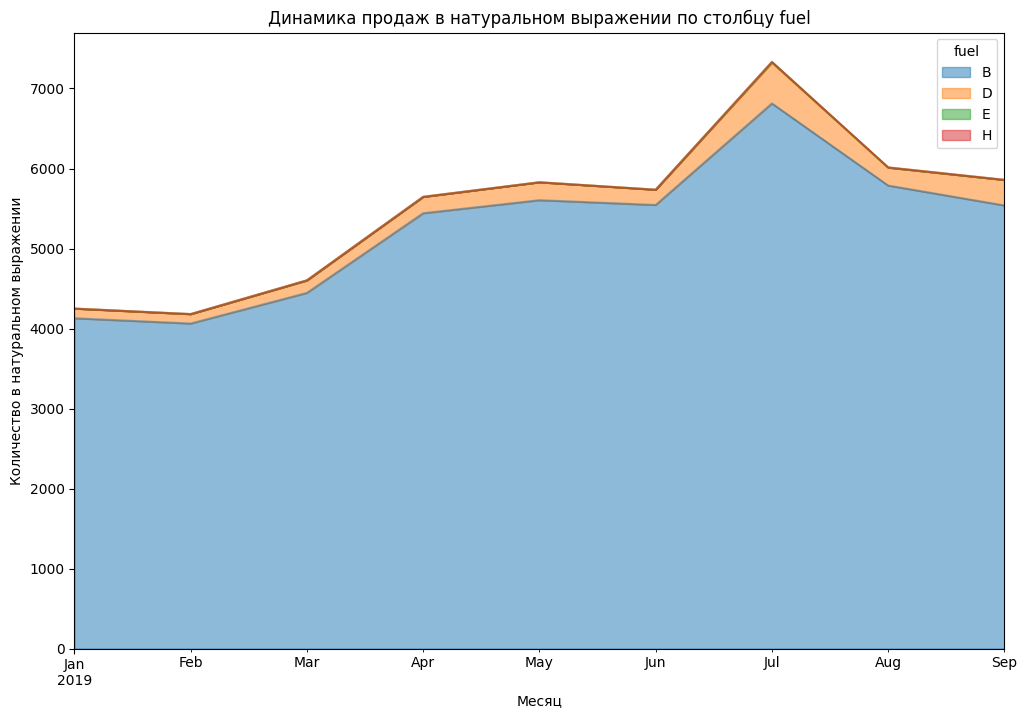

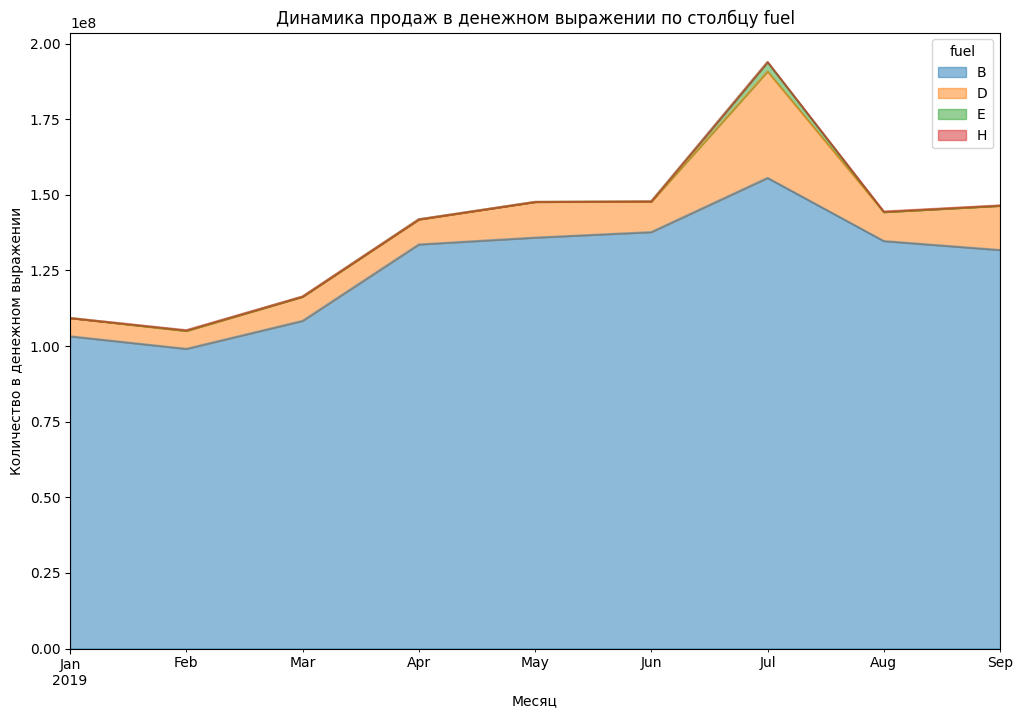

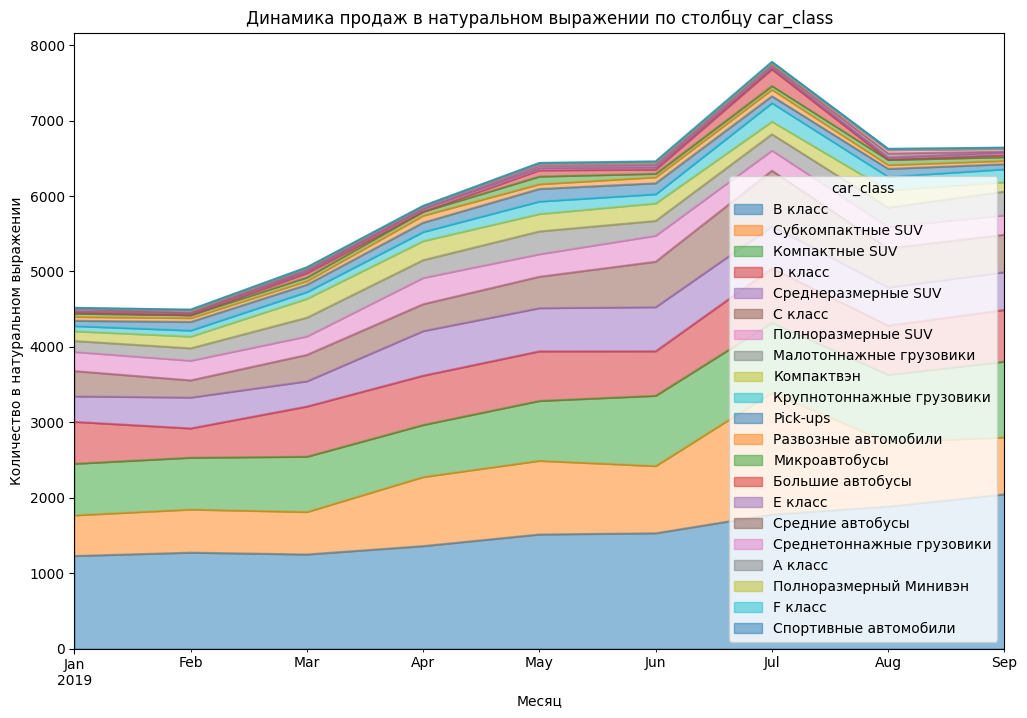

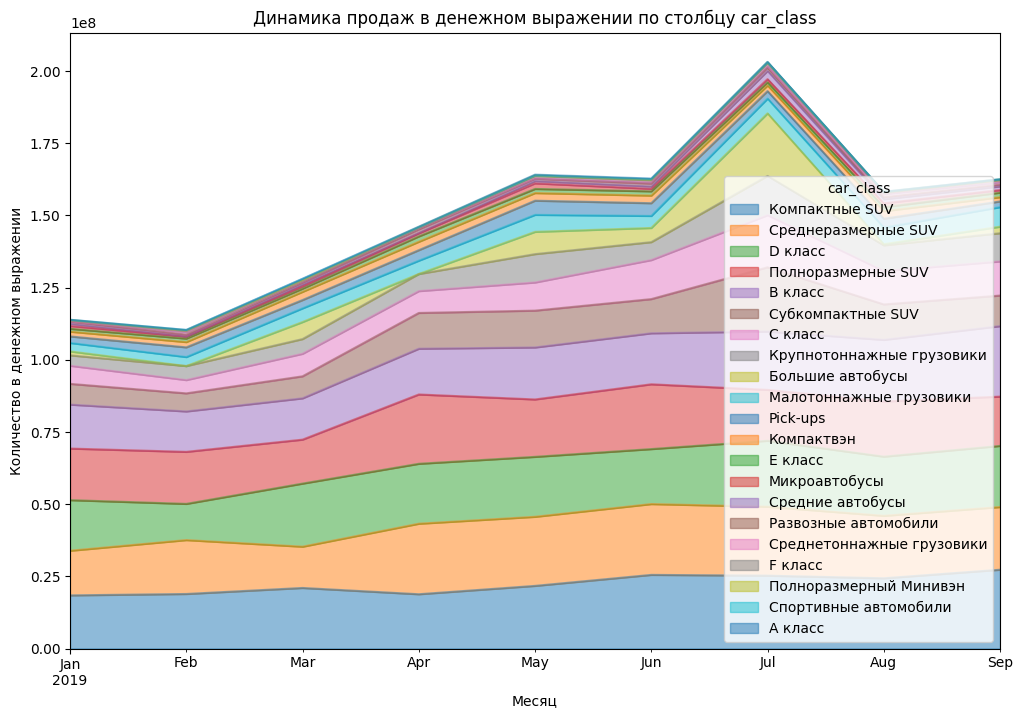

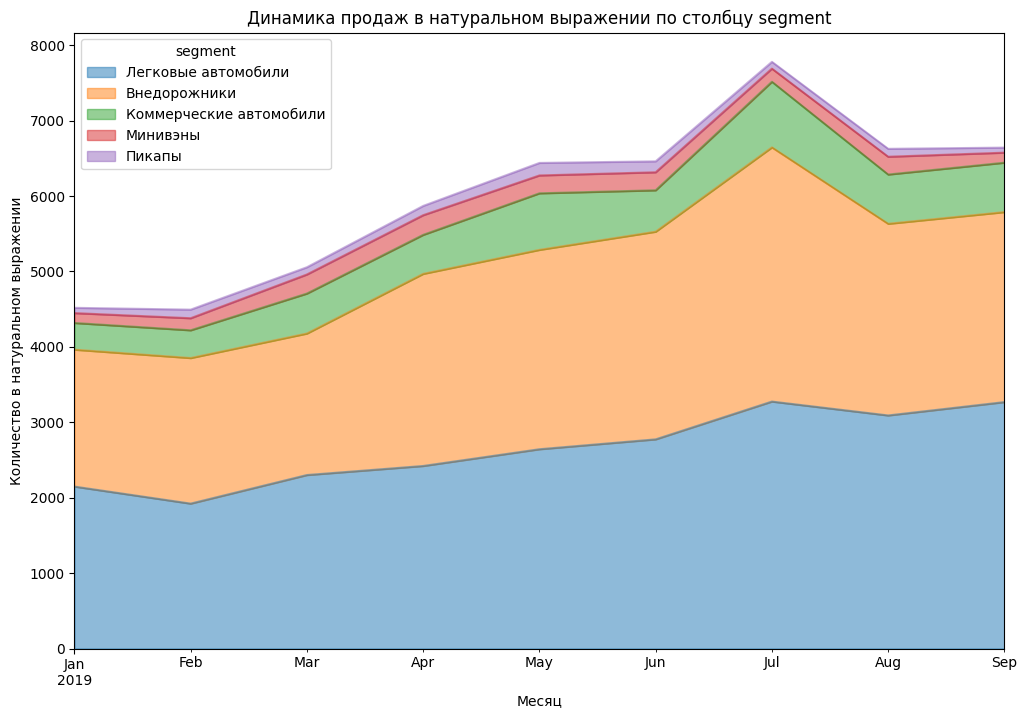

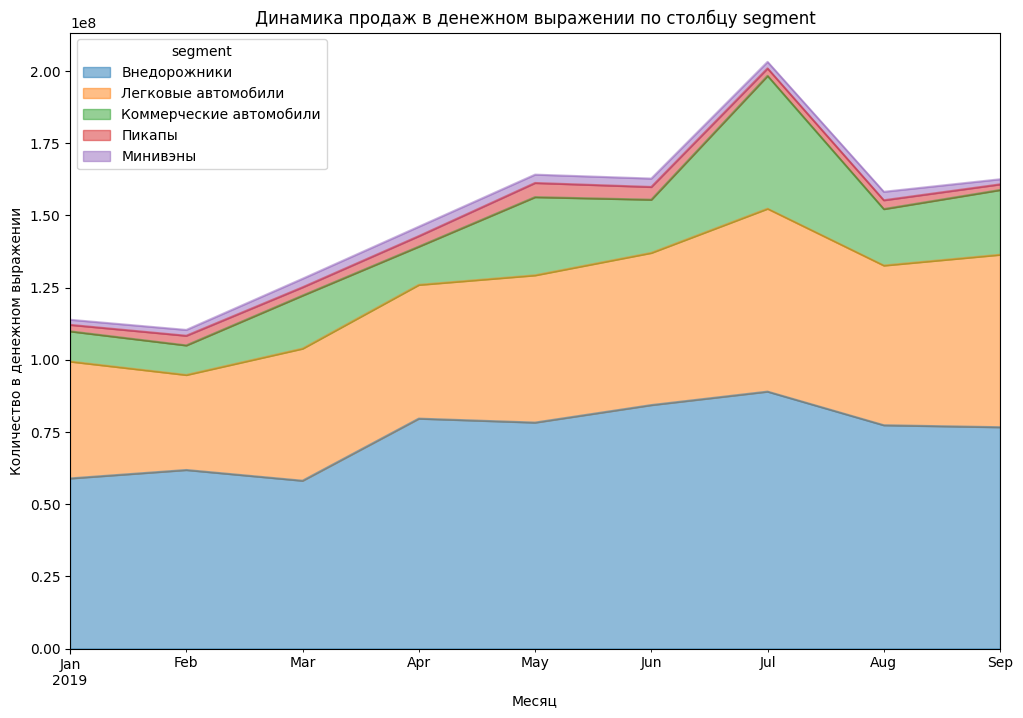

In [188]:
category =['fuel', 'car_class', 'segment']
columns = ['amount', 'revenue']
for cat in category:
  i = 0
  for column in columns:
    label = labels[i]
    i = i + 1
    sales_by_cat = df.pivot_table(index='date', columns=cat, values=column, aggfunc='sum')
    sales_by_cat = sales_by_cat[sales_by_cat.sum().sort_values(ascending=False).index]
    sales_by_cat.plot(kind='area', alpha=0.5)
    plt.title(f'Динамика продаж в {label} выражении по столбцу {cat}')
    plt.ylabel(f'Количество в {label} выражении')
    plt.xlabel('Месяц')
    plt.show()


Основной вид топлива проданных автомобилей - бензин. Небольшую часть рынка сотавляют дизельные автомобили, и совсем незначительную - электромобили и гибриды.

Продажи легковых автомобилей и внедорожников занимают лидирующее положение. На третьем месте - коммерческие автомобили. Минивэны и пикапы в аутсайдерах.

В июле автомобилили стоили дороже, по сравнению с другими месяцами, в таких категориях как:
- дизельные автомобили;
- полноразмерные минивэны;
- коммерческие автомобили.

**2.5 Продажи по регионам**

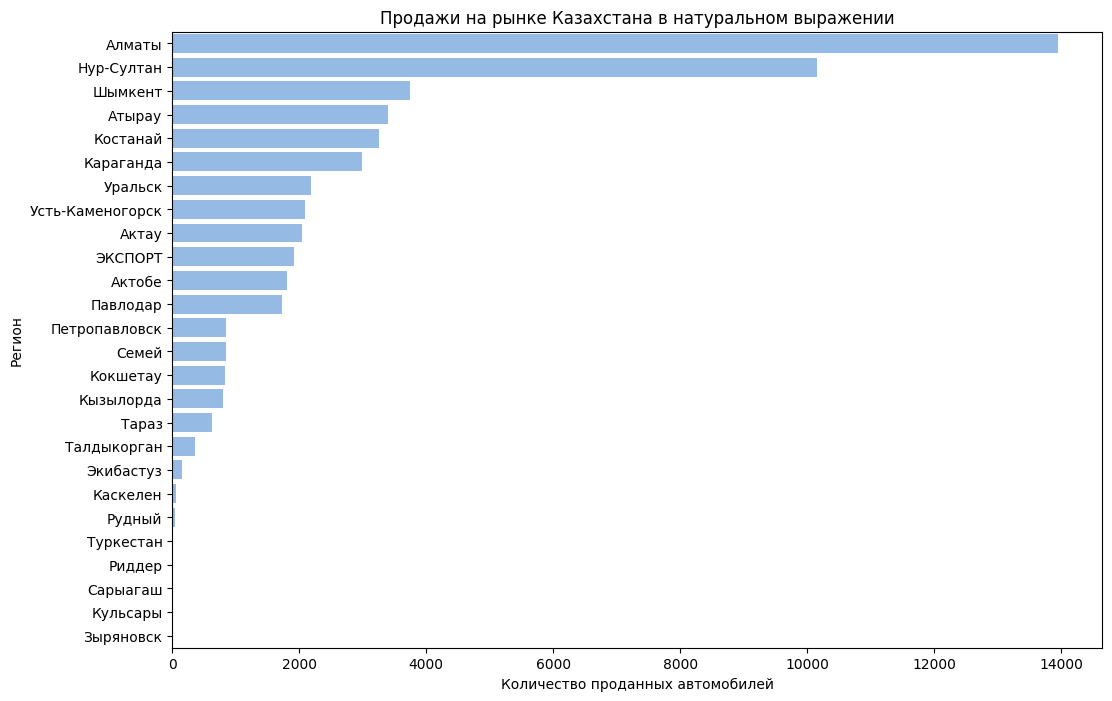

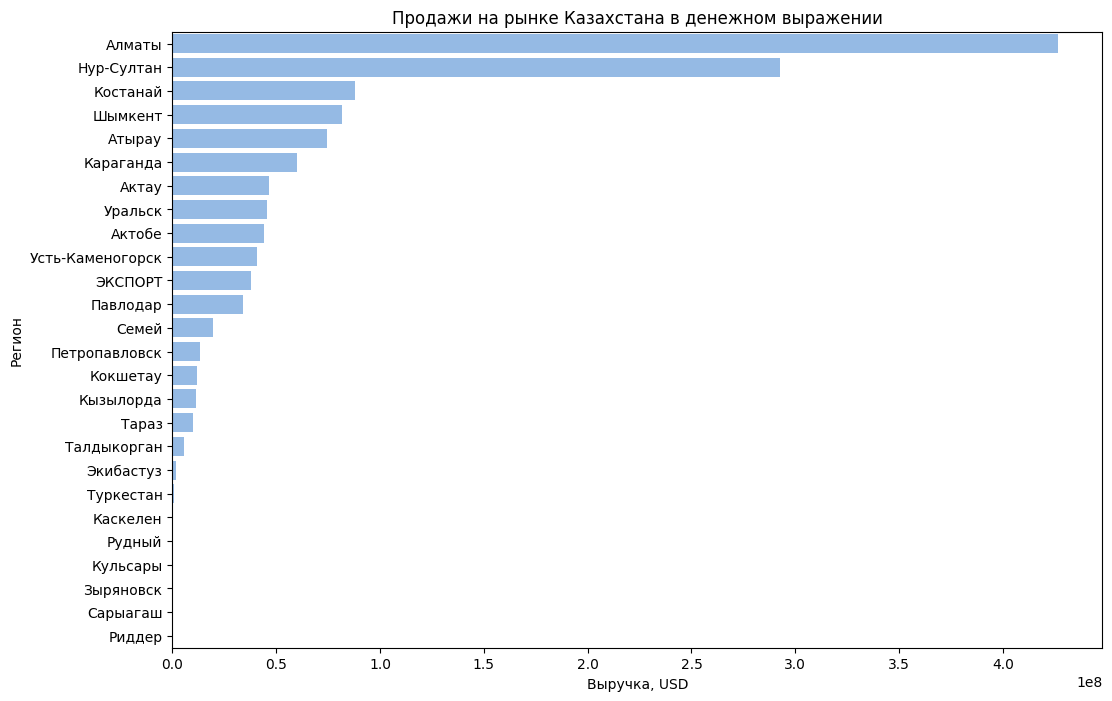

In [187]:
labels_x = ['Количество проданных автомобилей', 'Выручка, USD']
i = 0
for column in columns:
  label = labels[i]
  label_x = labels_x[i]
  i = i + 1
  sales_region = df.groupby('region', as_index=False).agg({column:'sum'}).sort_values(by=column, ascending=False)
  sns.barplot(data=sales_region, x=column, y='region', facecolor='#95bae4')
  plt.xlabel(label_x)
  plt.ylabel('Регион')
  plt.title(f'Продажи на рынке Казахстана в {label} выражении')
  plt.show()

Алматы и Нур-Султан (Астана) - города республиканского значения, лидеры по продажам автомобилей в Казахстане.

Интересно, что Костанай на 5 месте по количеству проданных авто и на 3 месте по выручке.

В топ-6 также входят регионы: Шымкент, Атырау, Караганда.

**2.6 Продажи по автоцентрам**

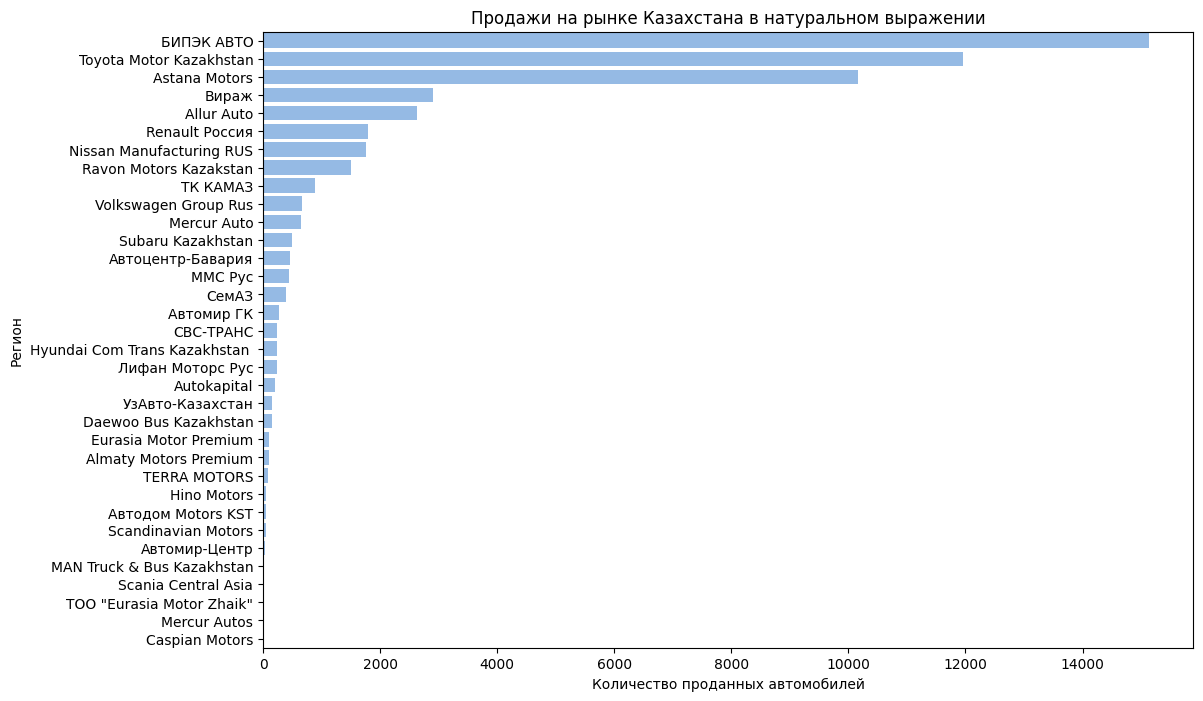

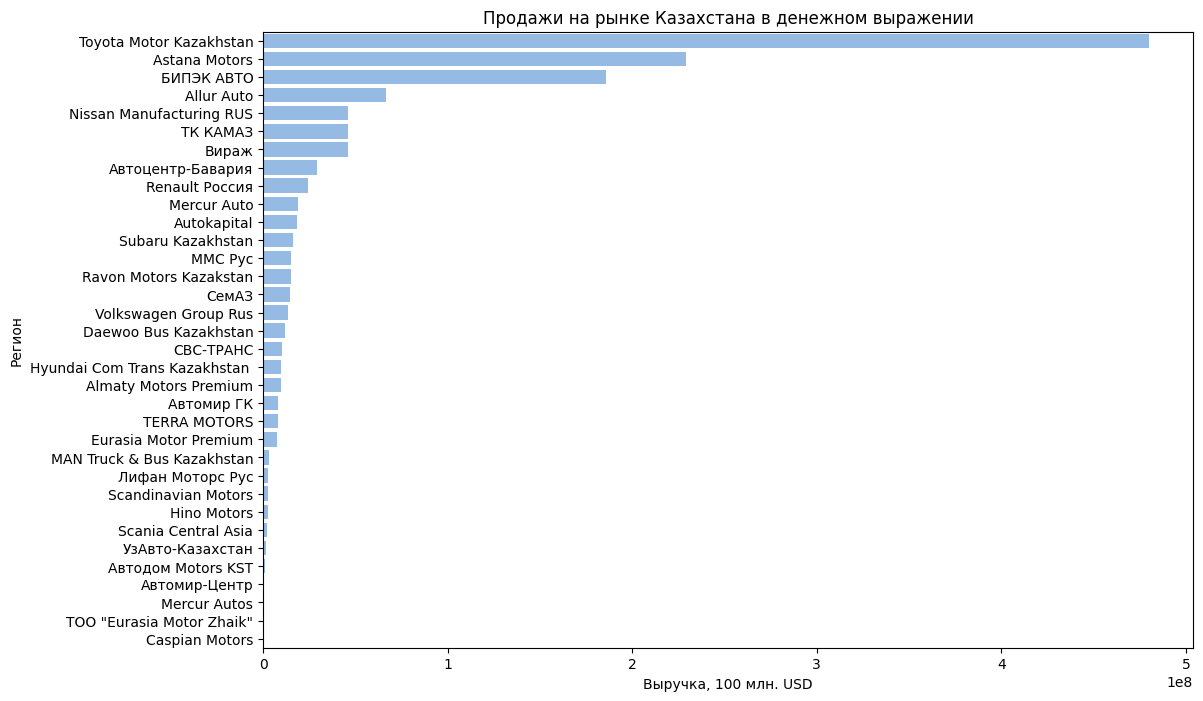

In [190]:
labels_x = ['Количество проданных автомобилей', 'Выручка, 100 млн. USD']
i = 0
for column in columns:
  label = labels[i]
  label_x = labels_x[i]
  i = i + 1
  sales_company = df.groupby('company', as_index=False).agg({column:'sum'}).sort_values(by=column, ascending=False)
  sns.barplot(data=sales_company, x=column, y='company', facecolor='#95bae4')
  plt.xlabel(label_x)
  plt.ylabel('Регион')
  plt.title(f'Продажи на рынке Казахстана в {label} выражении')
  plt.show()

На рынке Казахстана три крупных компании по продаже авто:
- Toyota Motor Kazakhstan
- Astana Motors
- БИПЭК АВТО

БИПЭК АВТО лидирует по количеству проданных авто, но уступает Toyota Motor Kazakhstan и Astana Motors по выручке.

**2.7 Объем продаж по бренду и классу авто**

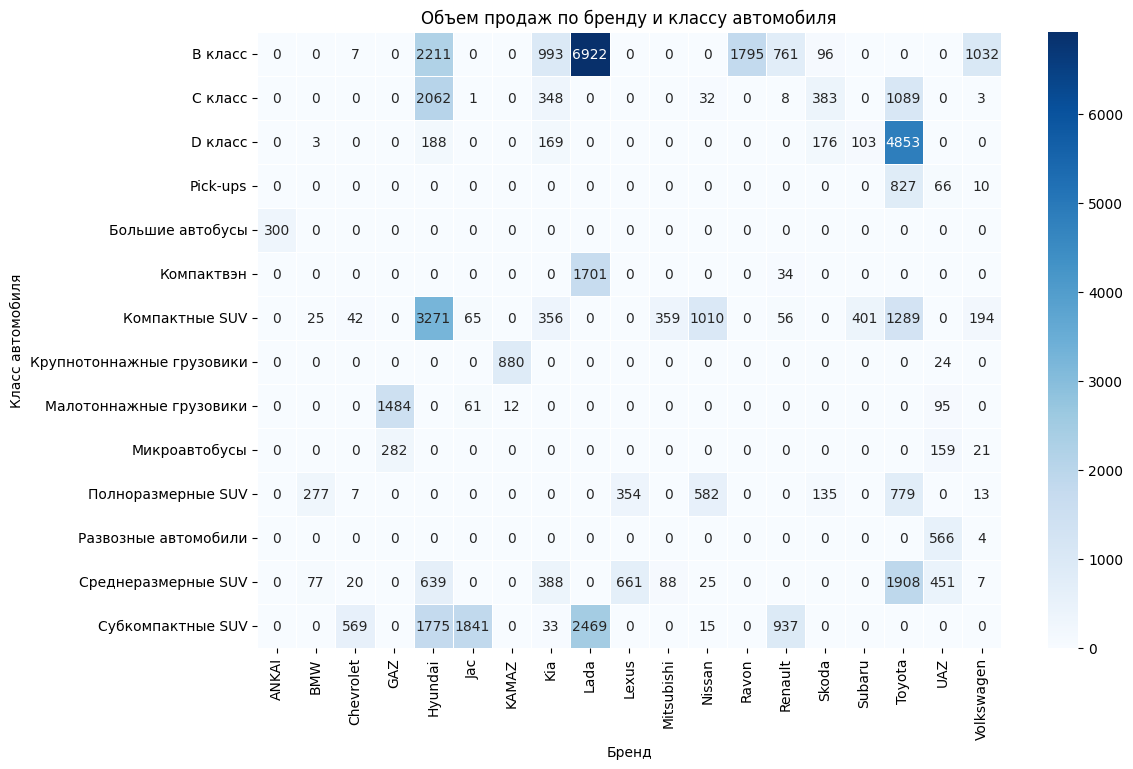

In [172]:
brand_class = df.groupby(['car_class', 'brand'])['amount'].agg('sum').unstack()

brand_class = brand_class[brand_class.max(axis=1) > 200]

brand_class = brand_class.T[brand_class.max(axis=0) > 200].T

sns.heatmap(brand_class, annot=True, fmt=".0f", linewidths=.5, cmap='Blues')

plt.xlabel('Бренд')

plt.ylabel('Класс автомобиля')

plt.title('Объем продаж по бренду и классу автомобиля');

Лидирующее положение в В классе автомобилей занимает Lada, в D классе больше всего продаж у Toyota. В компактных SUV лидирует Hyundai и в субкомпактных - опять Lada.

**ЧАСТЬ 3 ИТОГОВЫЕ ВЫВОДЫ ИССЛЕДОВАНИЯ**

Мы изучили датасет о продажах автомобилей компаниями-дилерами в Казахстане за январь-сентябрь 2019 года.

Целью работы было очистить данные, чтобы они стали пригодны для анализа.

После очистки данных был произведен анализ рынка:

- По количеству проданных машин в Казахстане за январь-сентябрь 2019 года три явных лидера: `Lada`, `Toyota` и `Hyndai`. В денежном выражении `Toyota` на первом месте, на втором - `Hyndai` и на третьем - `Lada`. На четвертом месте по количеству проданных машин, с большим отрывом от лидеров авторынка Казахстана, `Kia`, на пятом - `Jac`. По выручке `Kia` и  `Jac` обгоняют более дорогие марки машин и более крупные автомобили. `Lexus` и `KAMAZ` сдвигают вниз рейтинга `Kia`, а `Nissan` и `GAZ` - `Jac`.
- Всего продано машин: 53 874.
- Стоимость всех проданных машин: 1 349 140 758 USD.
- Наблюдается сезонность - летом продажи автомобилей идут лучше, чем зимой. Пик продаж приходился на июль.
- Основной вид топлива проданных автомобилей - бензин. Небольшую часть рынка сотавляют дизельные автомобили, и совсем незначительную - электромобили и гибриды.
- Продажи легковых автомобилей и внедорожников занимают лидирующее положение. На третьем месте - коммерческие автомобили. Минивэны и пикапы в аутсайдерах.
- В июле автомобилили стоили дороже, по сравнению с другими месяцами, в таких категориях как:
  - дизельные автомобили;
  - полноразмерные минивэны;
  - коммерческие автомобили.
- Алматы и Нур-Султан (Астана) - города республиканского значения, лидеры по продажам автомобилей в Казахстане. Интересно, что Костанай на 5 месте по количеству проданных авто и на 3 месте по выручке. В топ-6 также входят регионы: Шымкент, Атырау, Караганда.
- На рынке Казахстана три крупных компании по продаже авто:
  - Toyota Motor Kazakhstan
  - Astana Motors
  - БИПЭК АВТО
- БИПЭК АВТО лидирует по количеству проданных авто, но уступает Toyota Motor Kazakhstan и Astana Motors по выручке.
- Лидирующее положение в В классе автомобилей занимает Lada, в D классе больше всего продаж у Toyota. В компактных SUV лидирует Hyundai и в субкомпактных - опять Lada.

Рекомендации: Самые продаваемые автомобили - это легковые автомобили и внедорожники, поэтому упор стоит делать именно на этот сегмент автомобилей. Вид топлива - бензин. Предпочтительная марка автомобилей:  `Lada`, `Toyota`, `Hyndai`, `Kia` и  `Jac`. Летом продажи, как правило, идут лучше. Основные конкуренты на рынке: `Toyota Motor Kazakhstan`, `Astana Motors` и `БИПЭК АВТО`